## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 1. 31
- 성명 : 한정현
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


0.9122807017543859


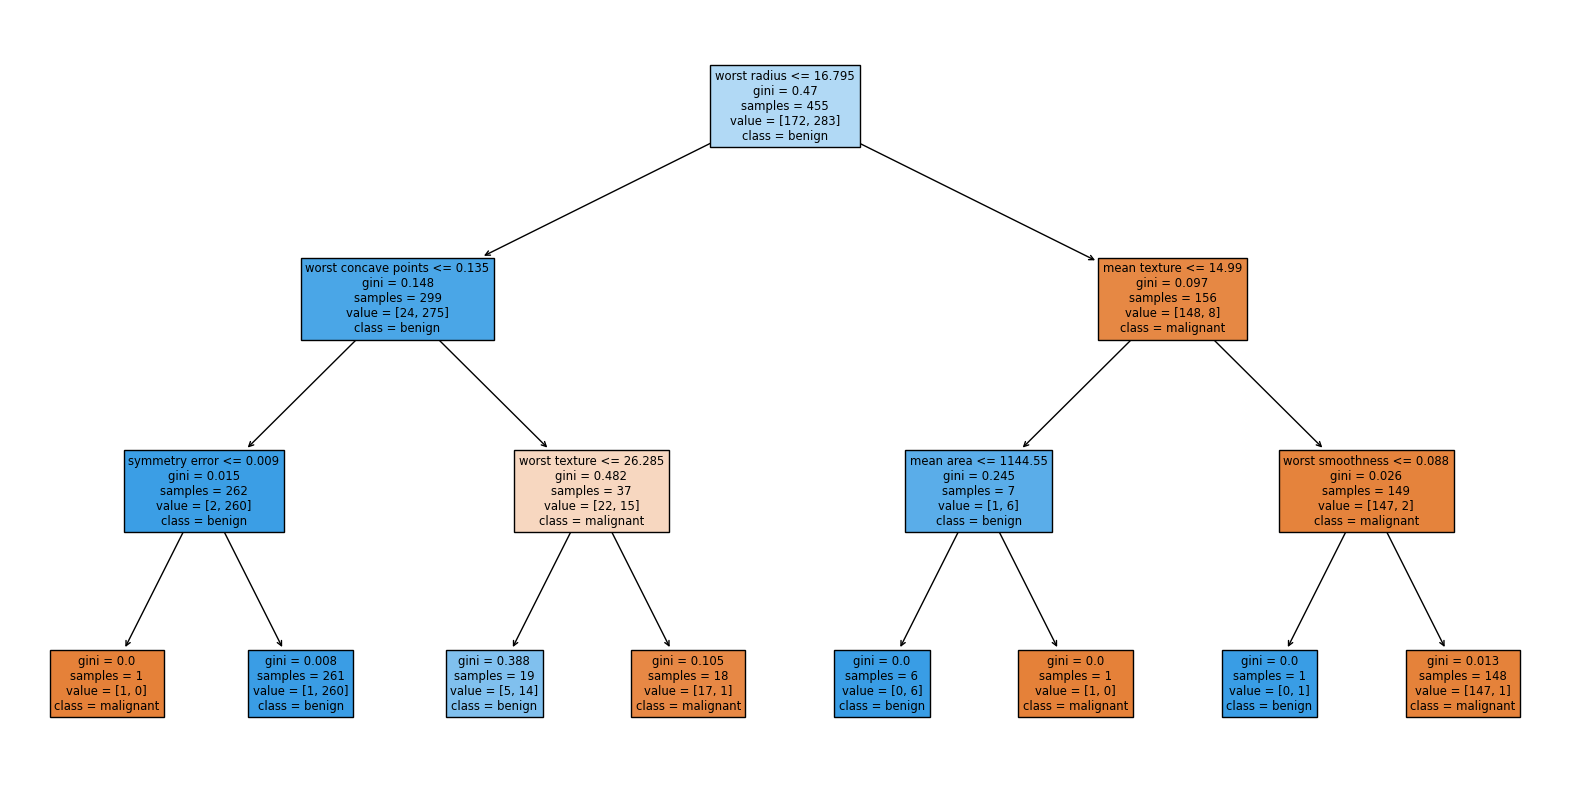

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 여기부터 시작.
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

Q2. 사이킷런 datasets에 있는 load_breast_cancer 데이터에 대하여 GaussianNB 알고리즘을 적용하여 분류 분석 모델링 및 정확도로 평가를 수행하세요.

In [4]:
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
print(accuracy_score(y_test, pred))

GaussianNB Accuracy: 0.956140350877193


Q3. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV

wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.9444444444444444


Q4. 캘리포니아 주택 데이터셋 불러온 후 아래 사항을 수행하세요.
- y 데이터를 박스플롯으로 시각화해서 이상치 여부를 파악하시고 이상치를 제거한 후 y 분포와 y_log의 분포를 시각화 하세요.

<Axes: ylabel='Count'>

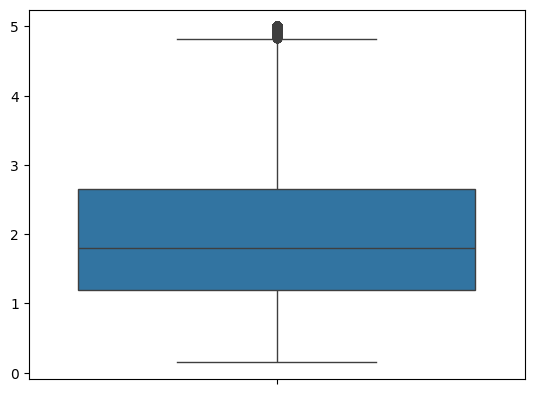

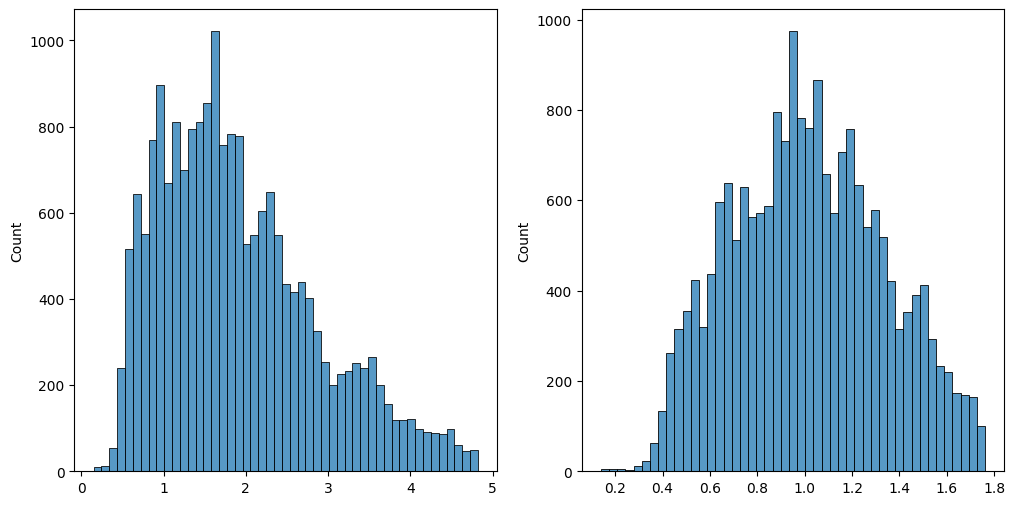

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 캘리포니아 주택 데이터셋 불러오기
housing = fetch_california_housing()
# 여기부터 시작.

X = housing.data
y = housing.target

plt.figure(figsize=(5,5))
sns.boxplot(y=y)

q1 = np.percentile(y, [25])
q3 = np.percentile(y, [75])
IQR = q3 -q1
new = (y >= (q1 - 1.5*IQR)) & (y <= (q3 + 1.5*IQR))
y_new = y[new]
X_new = X[new]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(y_new)
plt.subplot(1,2,2)
sns.histplot(np.log1p(y_new))

Q5.Q. 주어진 data로 dt 회귀트리 모델로 모델링 및 MAE로 평가를 수행하세요.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = {
    'mileage': [10000, 20000, 30000, 40000, 50000],
    'year': [2015, 2014, 2013, 2012, 2011],
    'price': [15000, 12500, 10000, 7500, 5000]
}
df = pd.DataFrame(data)
# 여기부터 시작.
X = df[['mileage', 'year']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(mean_absolute_error(y_test, pred))

2500.0